## Import necessary libaraies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

**Problem Statement:**

**Avocado is a fruit consumed by people heavily in the United States.**

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

 * Date - The date of the observation
 * AveragePrice - the average price of a single avocado
 * type - conventional or organic
 * year - the year
 * Region - the city or region of the observation
 * Total Volume - Total number of avocados sold
 * 4046 - Total number of avocados with PLU 4046 sold
 * 4225 - Total number of avocados with PLU 4225 sold
 * 4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression


## Import the dataset

In [2]:
# Importing dataset and convert into dataframe
df = pd.read_csv('avocado.csv')

In [3]:
print('No of rows',df.shape[0])
print('No of columns',df.shape[1])

df.head()

No of rows 18249
No of columns 14


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Checking the columns of the dataset
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
# Drop useless columns
df = df.drop(columns=['Unnamed: 0'],axis=1)

We can remove columns 'Unnamed: 0' which is not any use in the model.

In [6]:
# Checking columns name and its datatype and its count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


We can observe that dtypes: float64(10), object(3), int(0). Date by default data type is object which need to change to datetime datatype. and lot of missing values. Let's check missing value with isnull method.

In [7]:
# Converting the datatype of Date Column from object to datetime
df["Date"] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [8]:
# Setting Date as Dataframe Index
df.set_index('Date',inplace=True)

The set_index() function is used to set the DataFrame index using existing columns.

In [9]:
# Checking missing value in the dataset
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can observe that no missing value.

In [10]:
# Checking duplicates values in the dataset
df.duplicated().sum()

0

We can observe that there are no duplicates value.

In [11]:
# Checking the unique value of each column
df.nunique().to_frame('No. of unique values')

,No. of unique values
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Total Bags,18097
Small Bags,17321
Large Bags,15082
XLarge Bags,5588
type,2


In [12]:
# Checking the value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64


Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: count, Length: 18237, dtype: int64


4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64


4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: count, Length: 18103, dtype: int64


4770
0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.0

In [13]:
# Create numerical dataframe
numerical = df.drop(columns=['type','year','region'],axis=1)

## Distribution of dataset

In [14]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


From the above description we can observe the following :-

1. We can easily suspect that some of the features contain outliers after looking at 50% and max columns.
2. For most of columns have minimum value of zero.
3. Almost in all columns value of mean is greater than median. Data is right skewed.
4. For most of columns value of std. deviation is greater than mean i.e. data is spread. 

In [15]:
print('Minimum Price of Avocado :',df.AveragePrice.min(),'USD')
print('Maximum Price of avacado :',df.AveragePrice.max(),'USD')
print('Average Price of avacado :',df.AveragePrice.mean(),'USD')

Minimum Price of Avocado : 0.44 USD
Maximum Price of avacado : 3.25 USD
Average Price of avacado : 1.405978409775878 USD


Avacado varies from 0.44 USD To 3.25 USD with average price of 1.40 USD per unit

**Checking Type of Avocado**

In [16]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [17]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [18]:
pd.crosstab(df.year,df.type)

type,conventional,organic
year,,
2015,2808,2807
2016,2808,2808
2017,2862,2860
2018,648,648


## Data Visualization

### Univariate Analysis

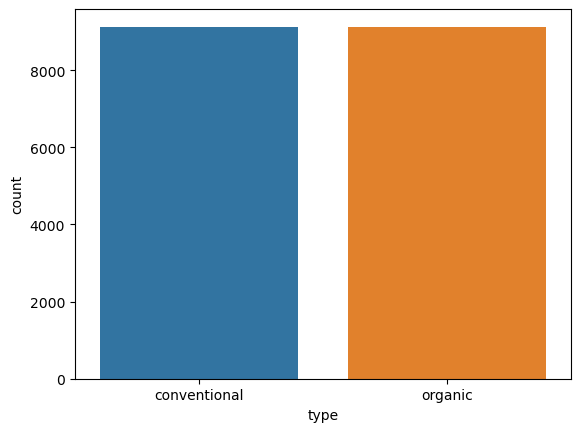

In [19]:
# Visualize the type columns
sns.countplot(x='type',data=df)
plt.show()

From the plot we can observe that the total number of conventional and organic are almost same.

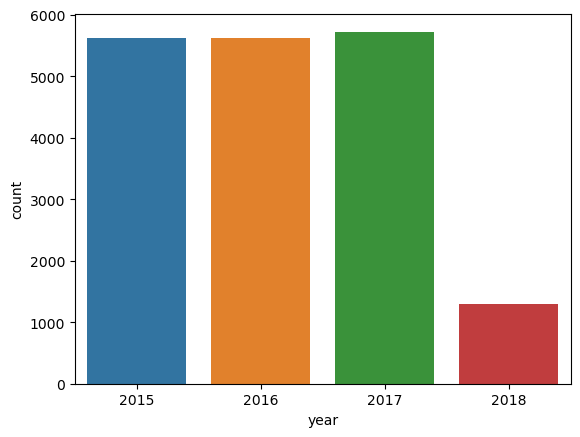

In [20]:
# Visualize the year columns
sns.countplot(x='year',data=df)
plt.show()

From the plot we can oberve that 2015,2016 and 2017 the count are almost same but 2018 has very low.

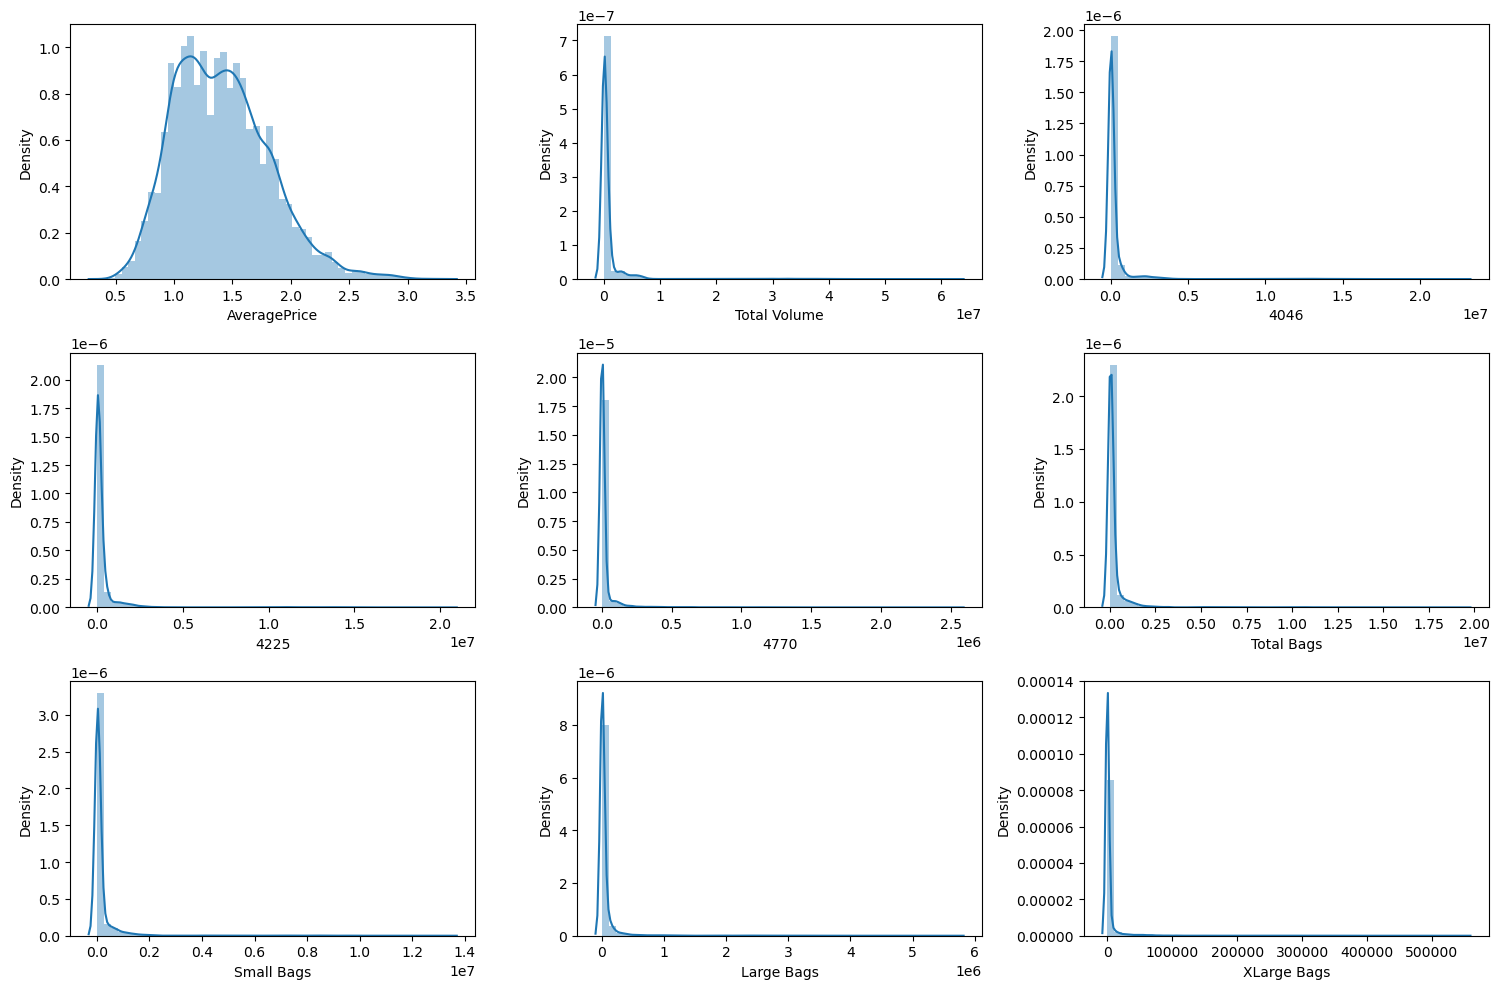

In [21]:
#  Let's check how the data has been distributed in remining column.
plt.figure(figsize=(15,10),facecolor='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(numerical[col])
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

We can see skewed data with presence of outliers with sharp peak. Most of the plots are right skewed, having value of mean very small compare to std. deviation & median. This is resulting in sharp high peak. Very few data points are present as we move away from zero to other end of x-axis.

### Bivariate Analysis

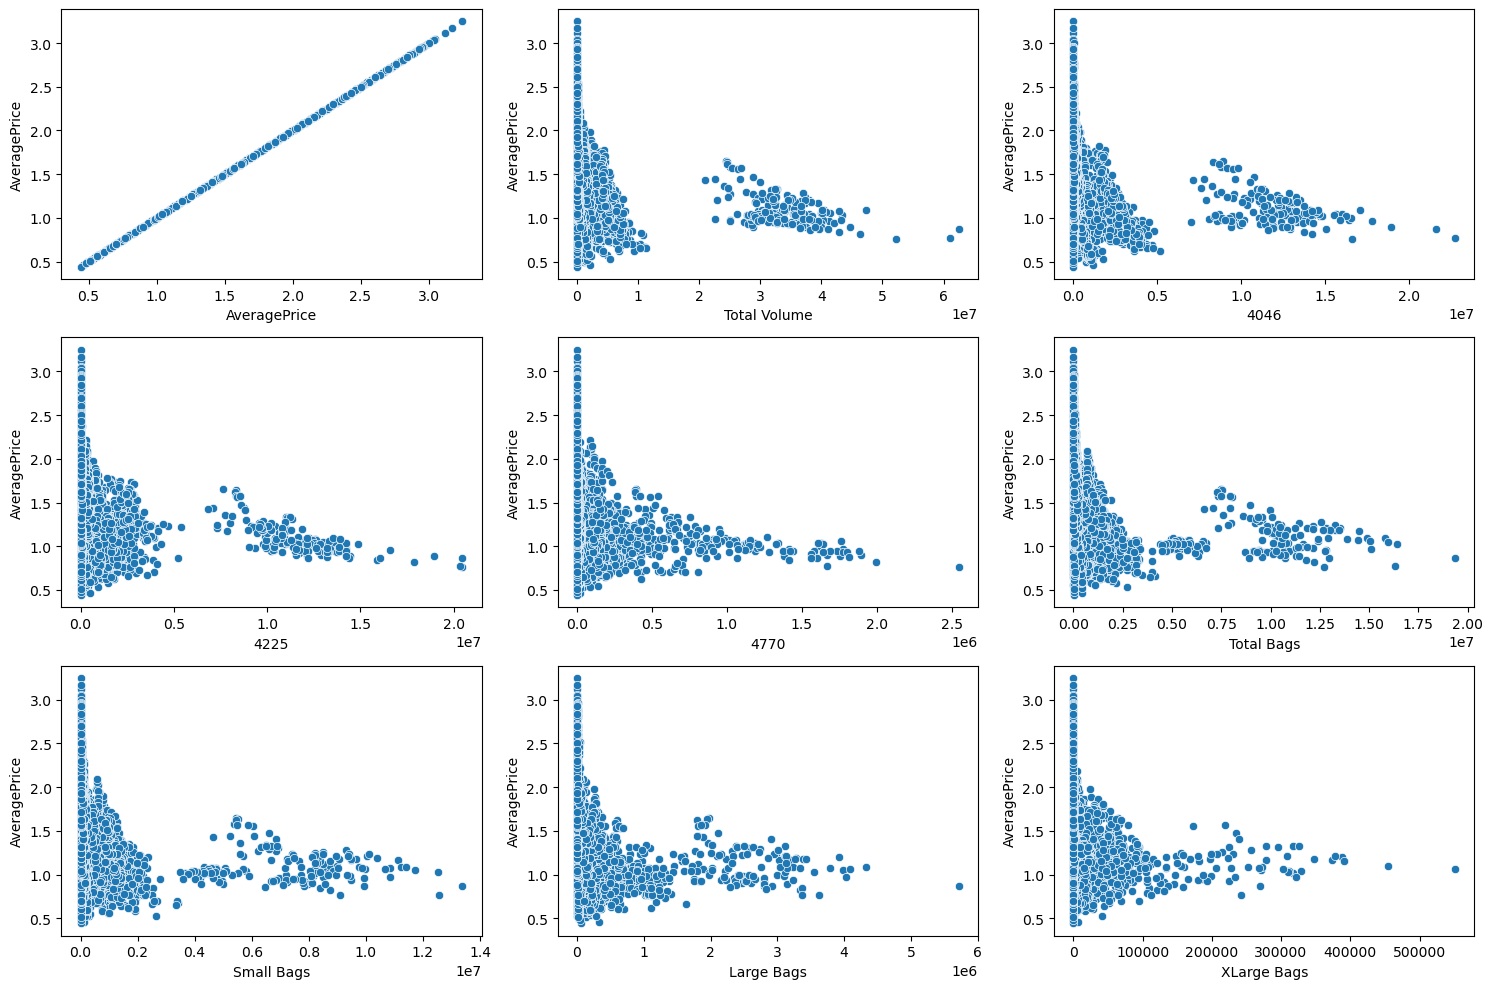

In [22]:
# Let' Compare all features vs AveragePrice using scatterplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.scatterplot(x=col,y='AveragePrice',data=numerical)
        plt.xlabel(col)
        plt.ylabel('AveragePrice')
    plotnumber+=1
plt.tight_layout()

We can observe there is no significant linear relationship between features vs target.

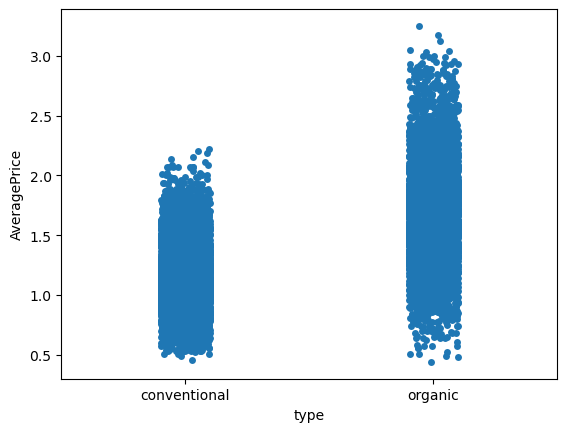

In [23]:
# Let's compare type vs AveragePrice
sns.stripplot(x='type',y='AveragePrice',data=df)
plt.show()

Here we can notice that converntional less than organic.

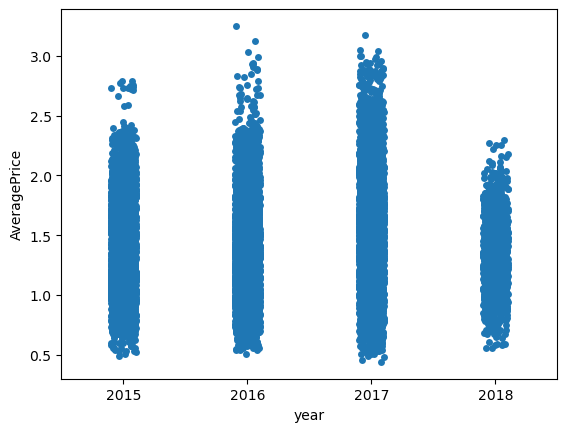

In [24]:
# Let's compare year vs AveragePrice
sns.stripplot(x='year',y='AveragePrice',data=df)
plt.show()

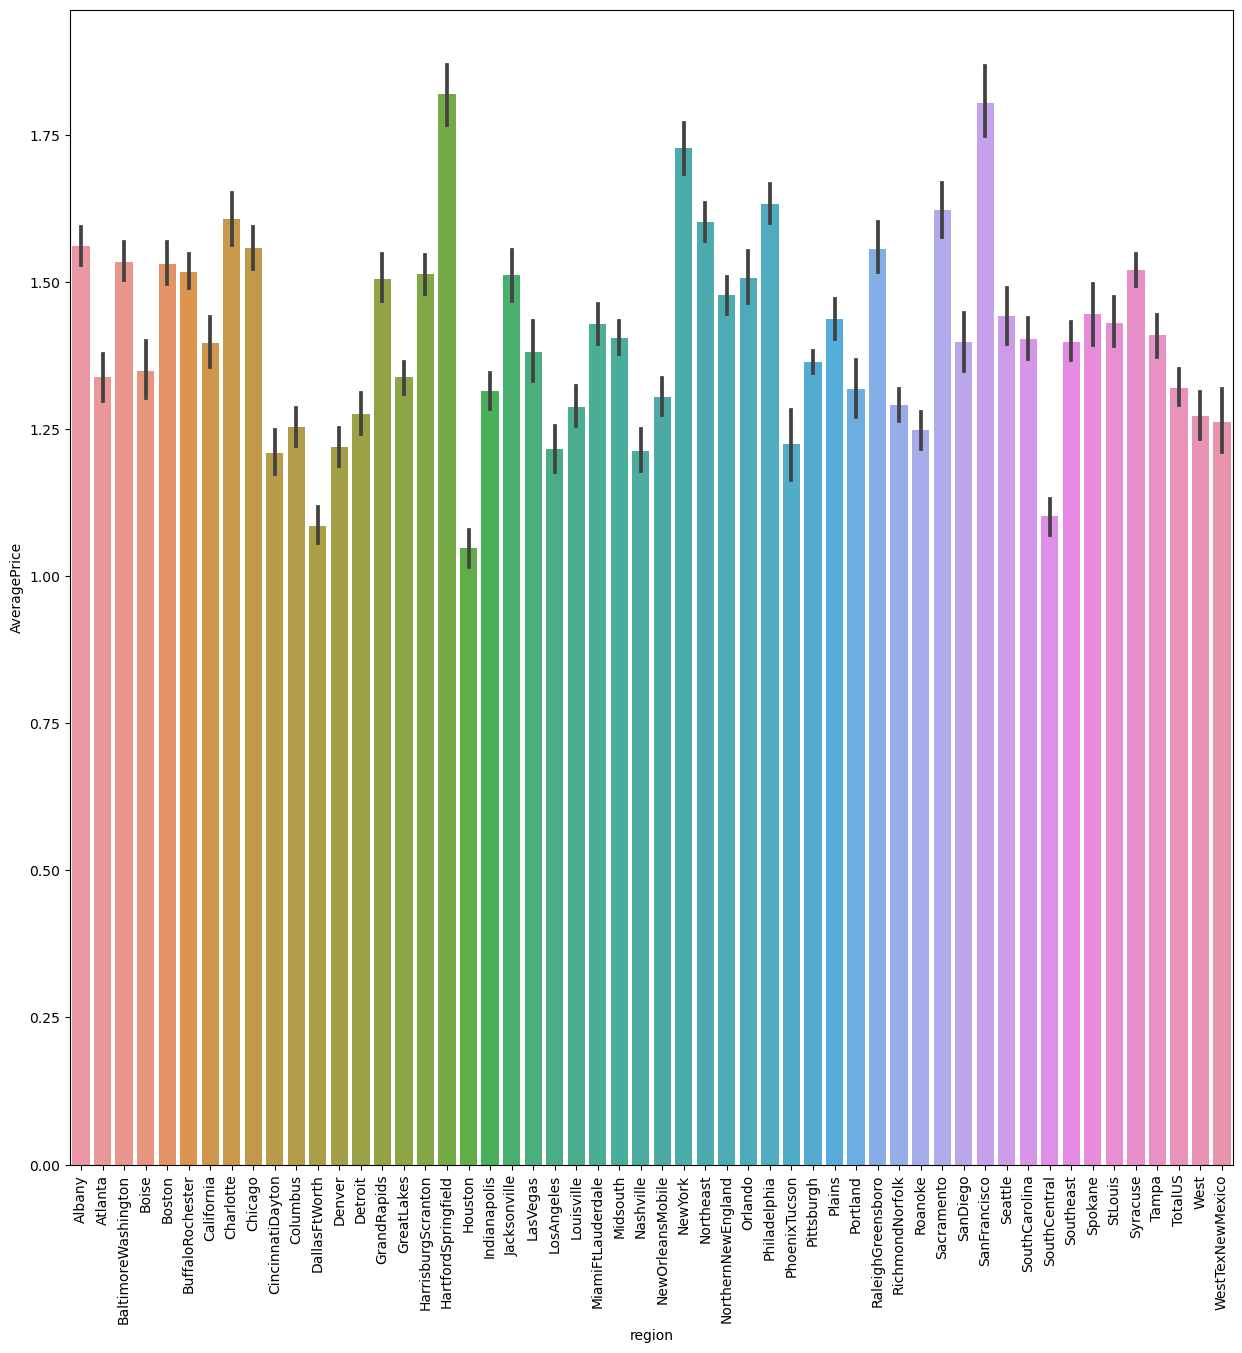

In [25]:
# Let's compare region vs AveragePrice
plt.figure(figsize=(15,15))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.show()

We observe that there are no more different of averageprice of all region.

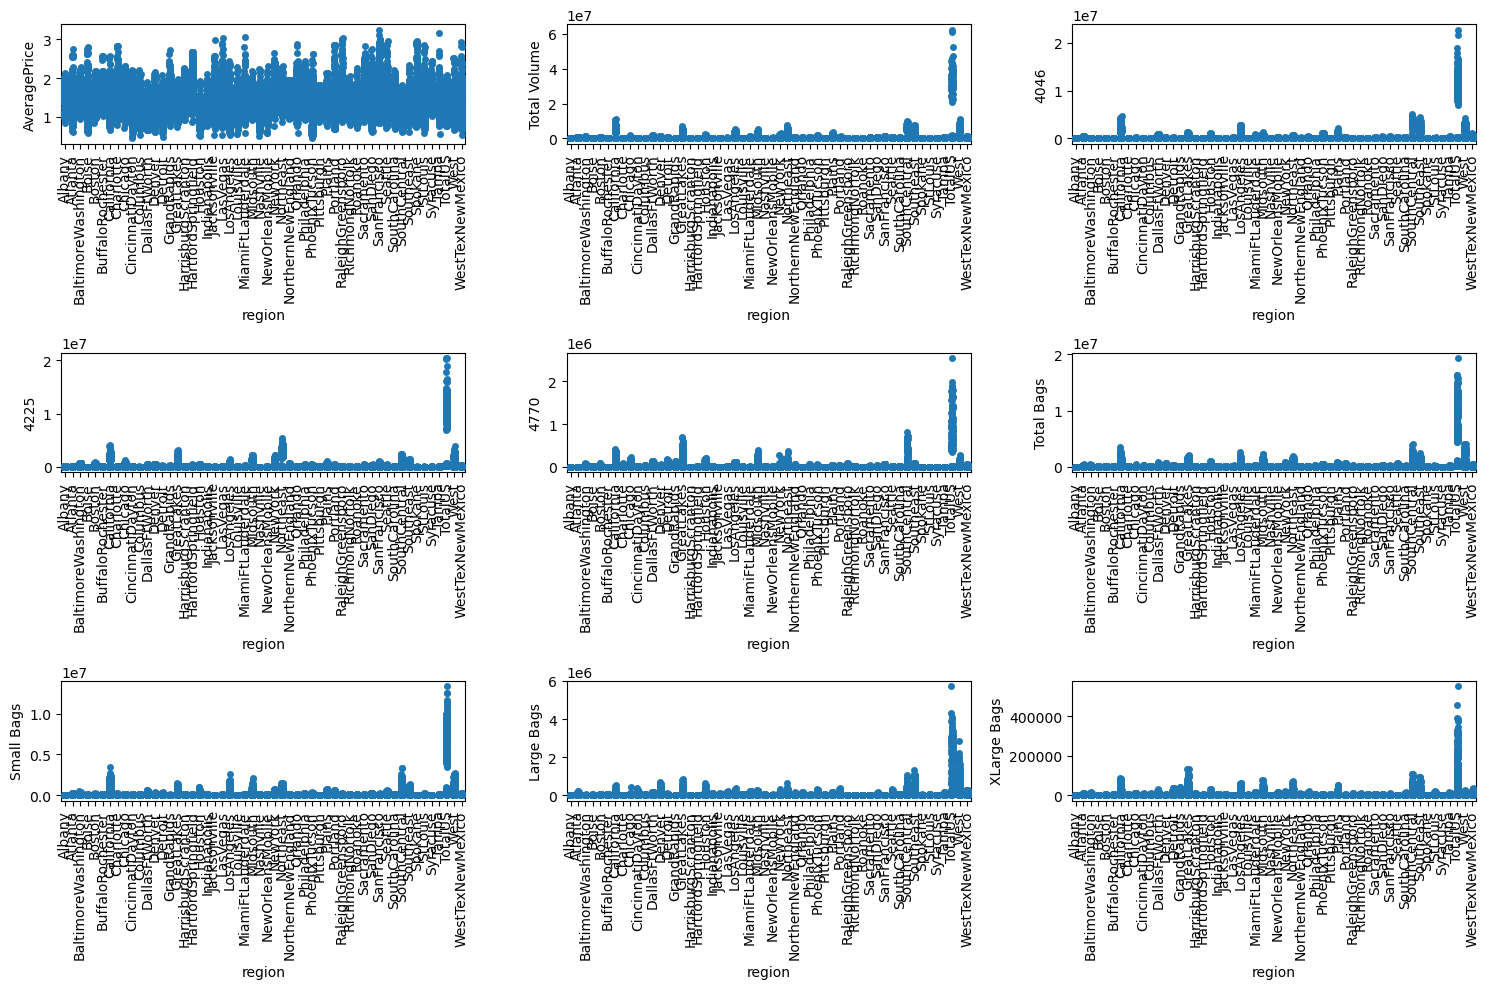

In [26]:
# Let' Compare all features vs region  using barplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y=col,x='region',data=df)
        plt.ylabel(col)
        plt.xlabel('region')
        plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout()

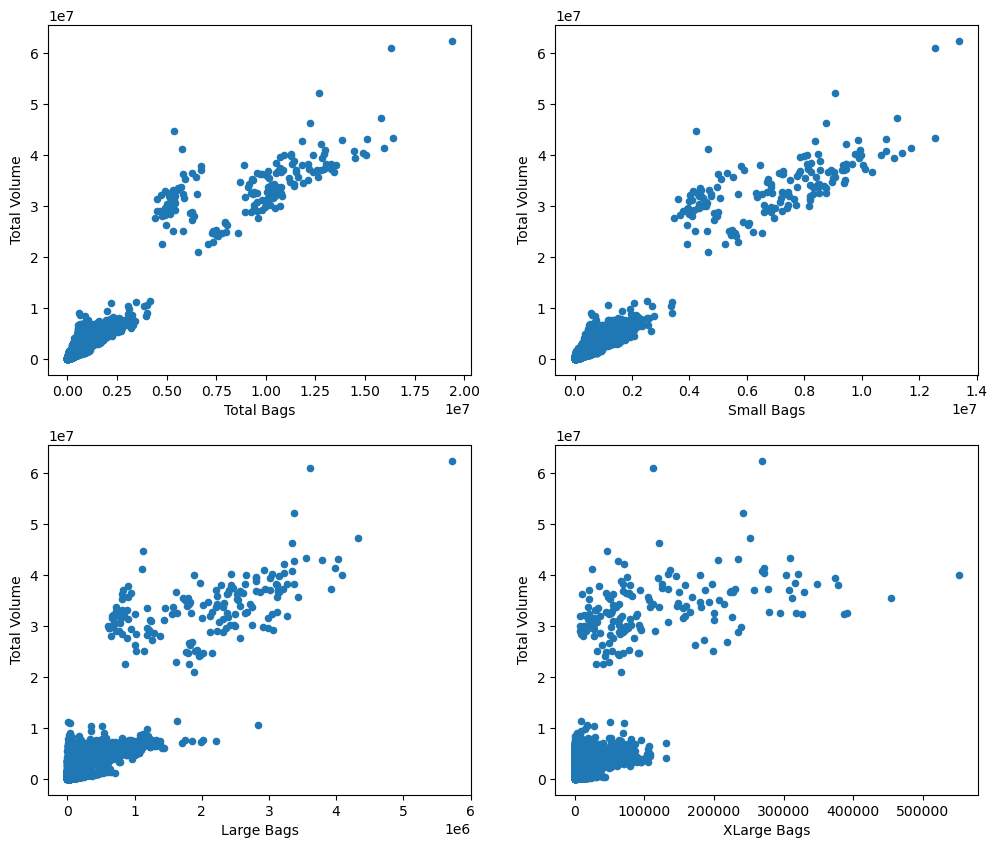

In [27]:
# Comparing Total Bags,Small Bags, Large Bags, XLarge Bags vs Total Volume 
fig, axs = plt.subplots(2,2)

df.plot(kind='scatter',x='Total Bags',y='Total Volume',ax=axs[0,0],figsize=(12,10))
df.plot(kind='scatter',x='Small Bags',y='Total Volume',ax=axs[0,1])
df.plot(kind='scatter',x='Large Bags',y='Total Volume',ax=axs[1,0])
df.plot(kind='scatter',x='XLarge Bags',y='Total Volume',ax=axs[1,1])                
plt.show()

Here we can notice the strong linear relation between the features.

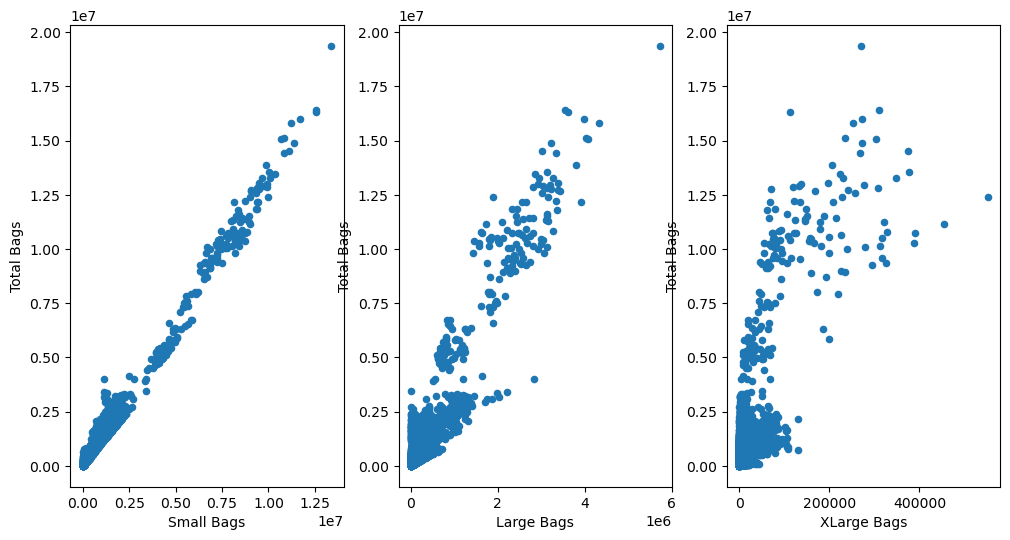

In [28]:
# Comparing Small Bags, Large Bags, XLarge Bags vs Total Bags
fig, axs = plt.subplots(1,3)

df.plot(kind='scatter',x='Small Bags',y='Total Bags',ax=axs[0],figsize=(12,6))
df.plot(kind='scatter',x='Large Bags',y='Total Bags',ax=axs[1])
df.plot(kind='scatter',x='XLarge Bags',y='Total Bags',ax=axs[2])
           
plt.show()

Here we can notice the strong linear relation between the features.

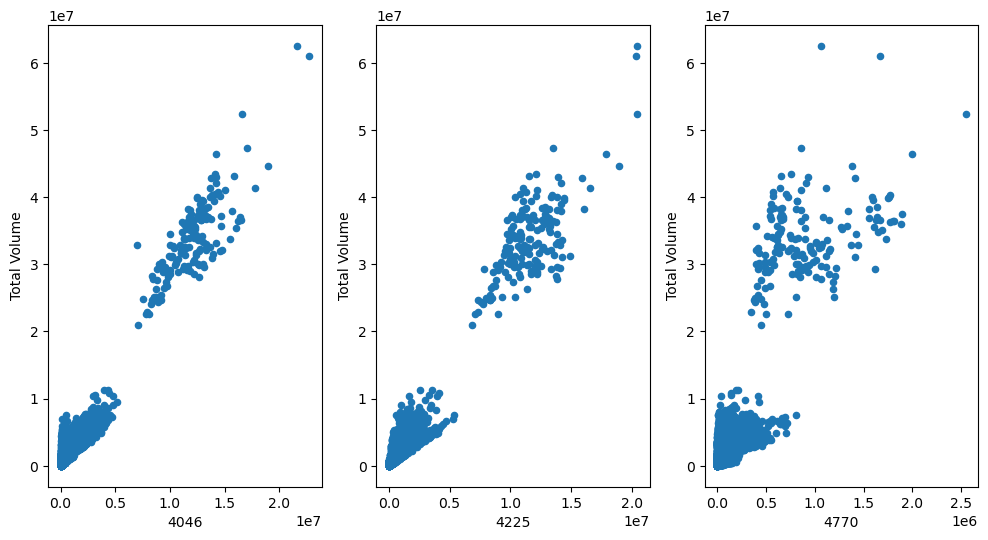

In [29]:
# Comparing 4046,4225, 4770 vs Total Volume 
fig, axs = plt.subplots(1,3)

df.plot(kind='scatter',x='4046',y='Total Volume',ax=axs[0],figsize=(12,6))
df.plot(kind='scatter',x='4225',y='Total Volume',ax=axs[1])
df.plot(kind='scatter',x='4770',y='Total Volume',ax=axs[2])                
plt.show()

Here we can notice the strong linear relation between the features.

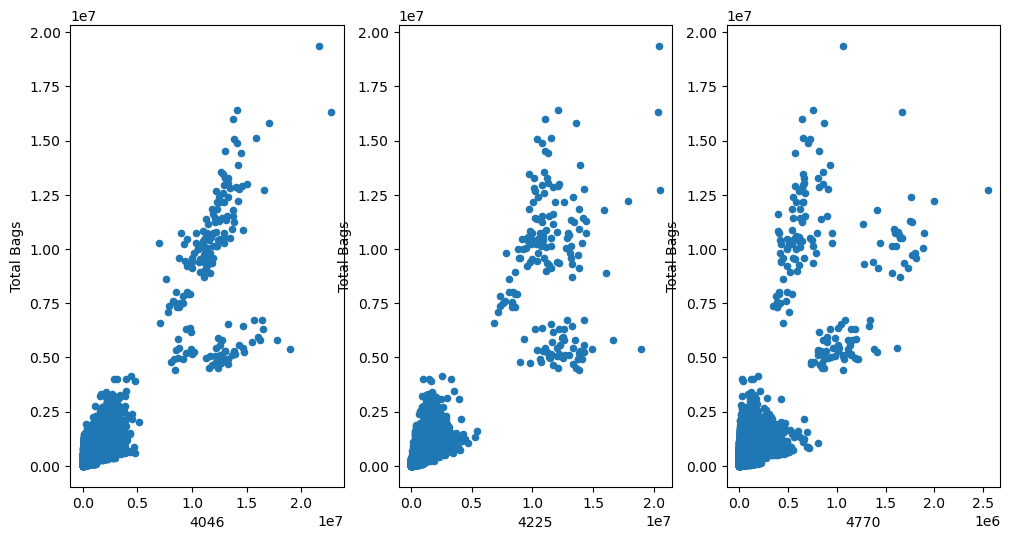

In [30]:
# Comparing 4046,4225, 4770 vs Total Bags 
fig, axs = plt.subplots(1,3)

df.plot(kind='scatter',x='4046',y='Total Bags',ax=axs[0],figsize=(12,6))
df.plot(kind='scatter',x='4225',y='Total Bags',ax=axs[1])
df.plot(kind='scatter',x='4770',y='Total Bags',ax=axs[2])                
plt.show()

Here we can notice the strong linear relation between the features.

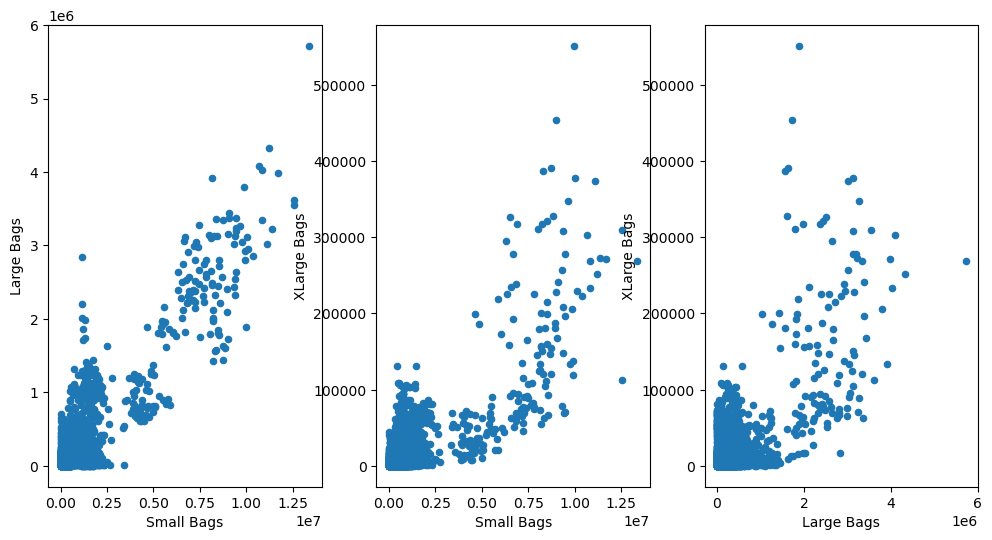

In [31]:
# Comparing  Small Bags vs Large Bags vs XLarge Bags
fig, axs = plt.subplots(1,3)

df.plot(kind='scatter',x='Small Bags',y='Large Bags',ax=axs[0],figsize=(12,6))
df.plot(kind='scatter',x='Small Bags',y='XLarge Bags',ax=axs[1])
df.plot(kind='scatter',x='Large Bags',y='XLarge Bags',ax=axs[2])
plt.show()

Here we can notice the strong linear relation between the features.

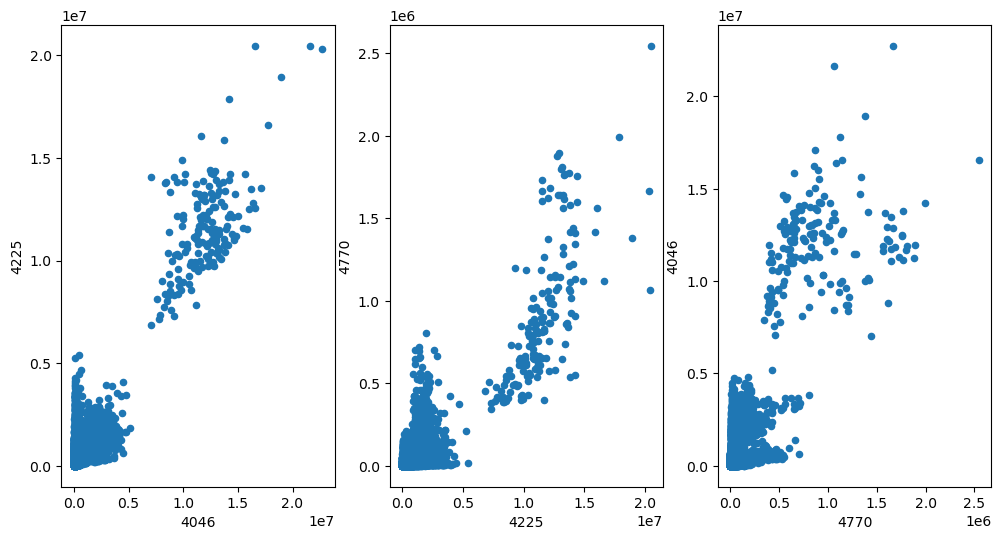

In [32]:
# Comparing 4046 vs 4225 vs 4770
fig, axs = plt.subplots(1,3)

df.plot(kind='scatter',x='4046',y='4225',ax=axs[0],figsize=(12,6))
df.plot(kind='scatter',x='4225',y='4770',ax=axs[1])
df.plot(kind='scatter',x='4770',y='4046',ax=axs[2])
plt.show()

Here we can notice the strong linear relation between the features.

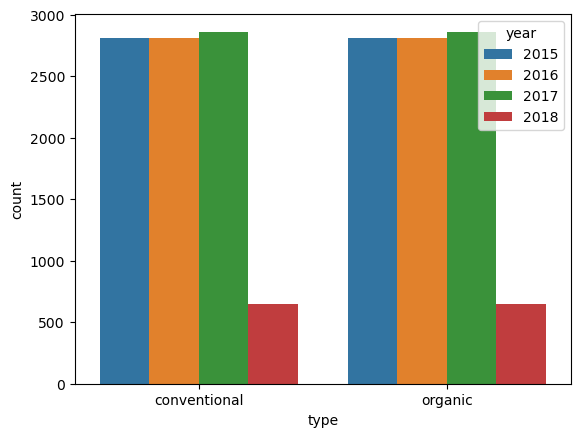

In [33]:
# Comparing type vs year
sns.countplot(x='type',hue='year',data=df)
plt.show()

### Multivariate Analysis

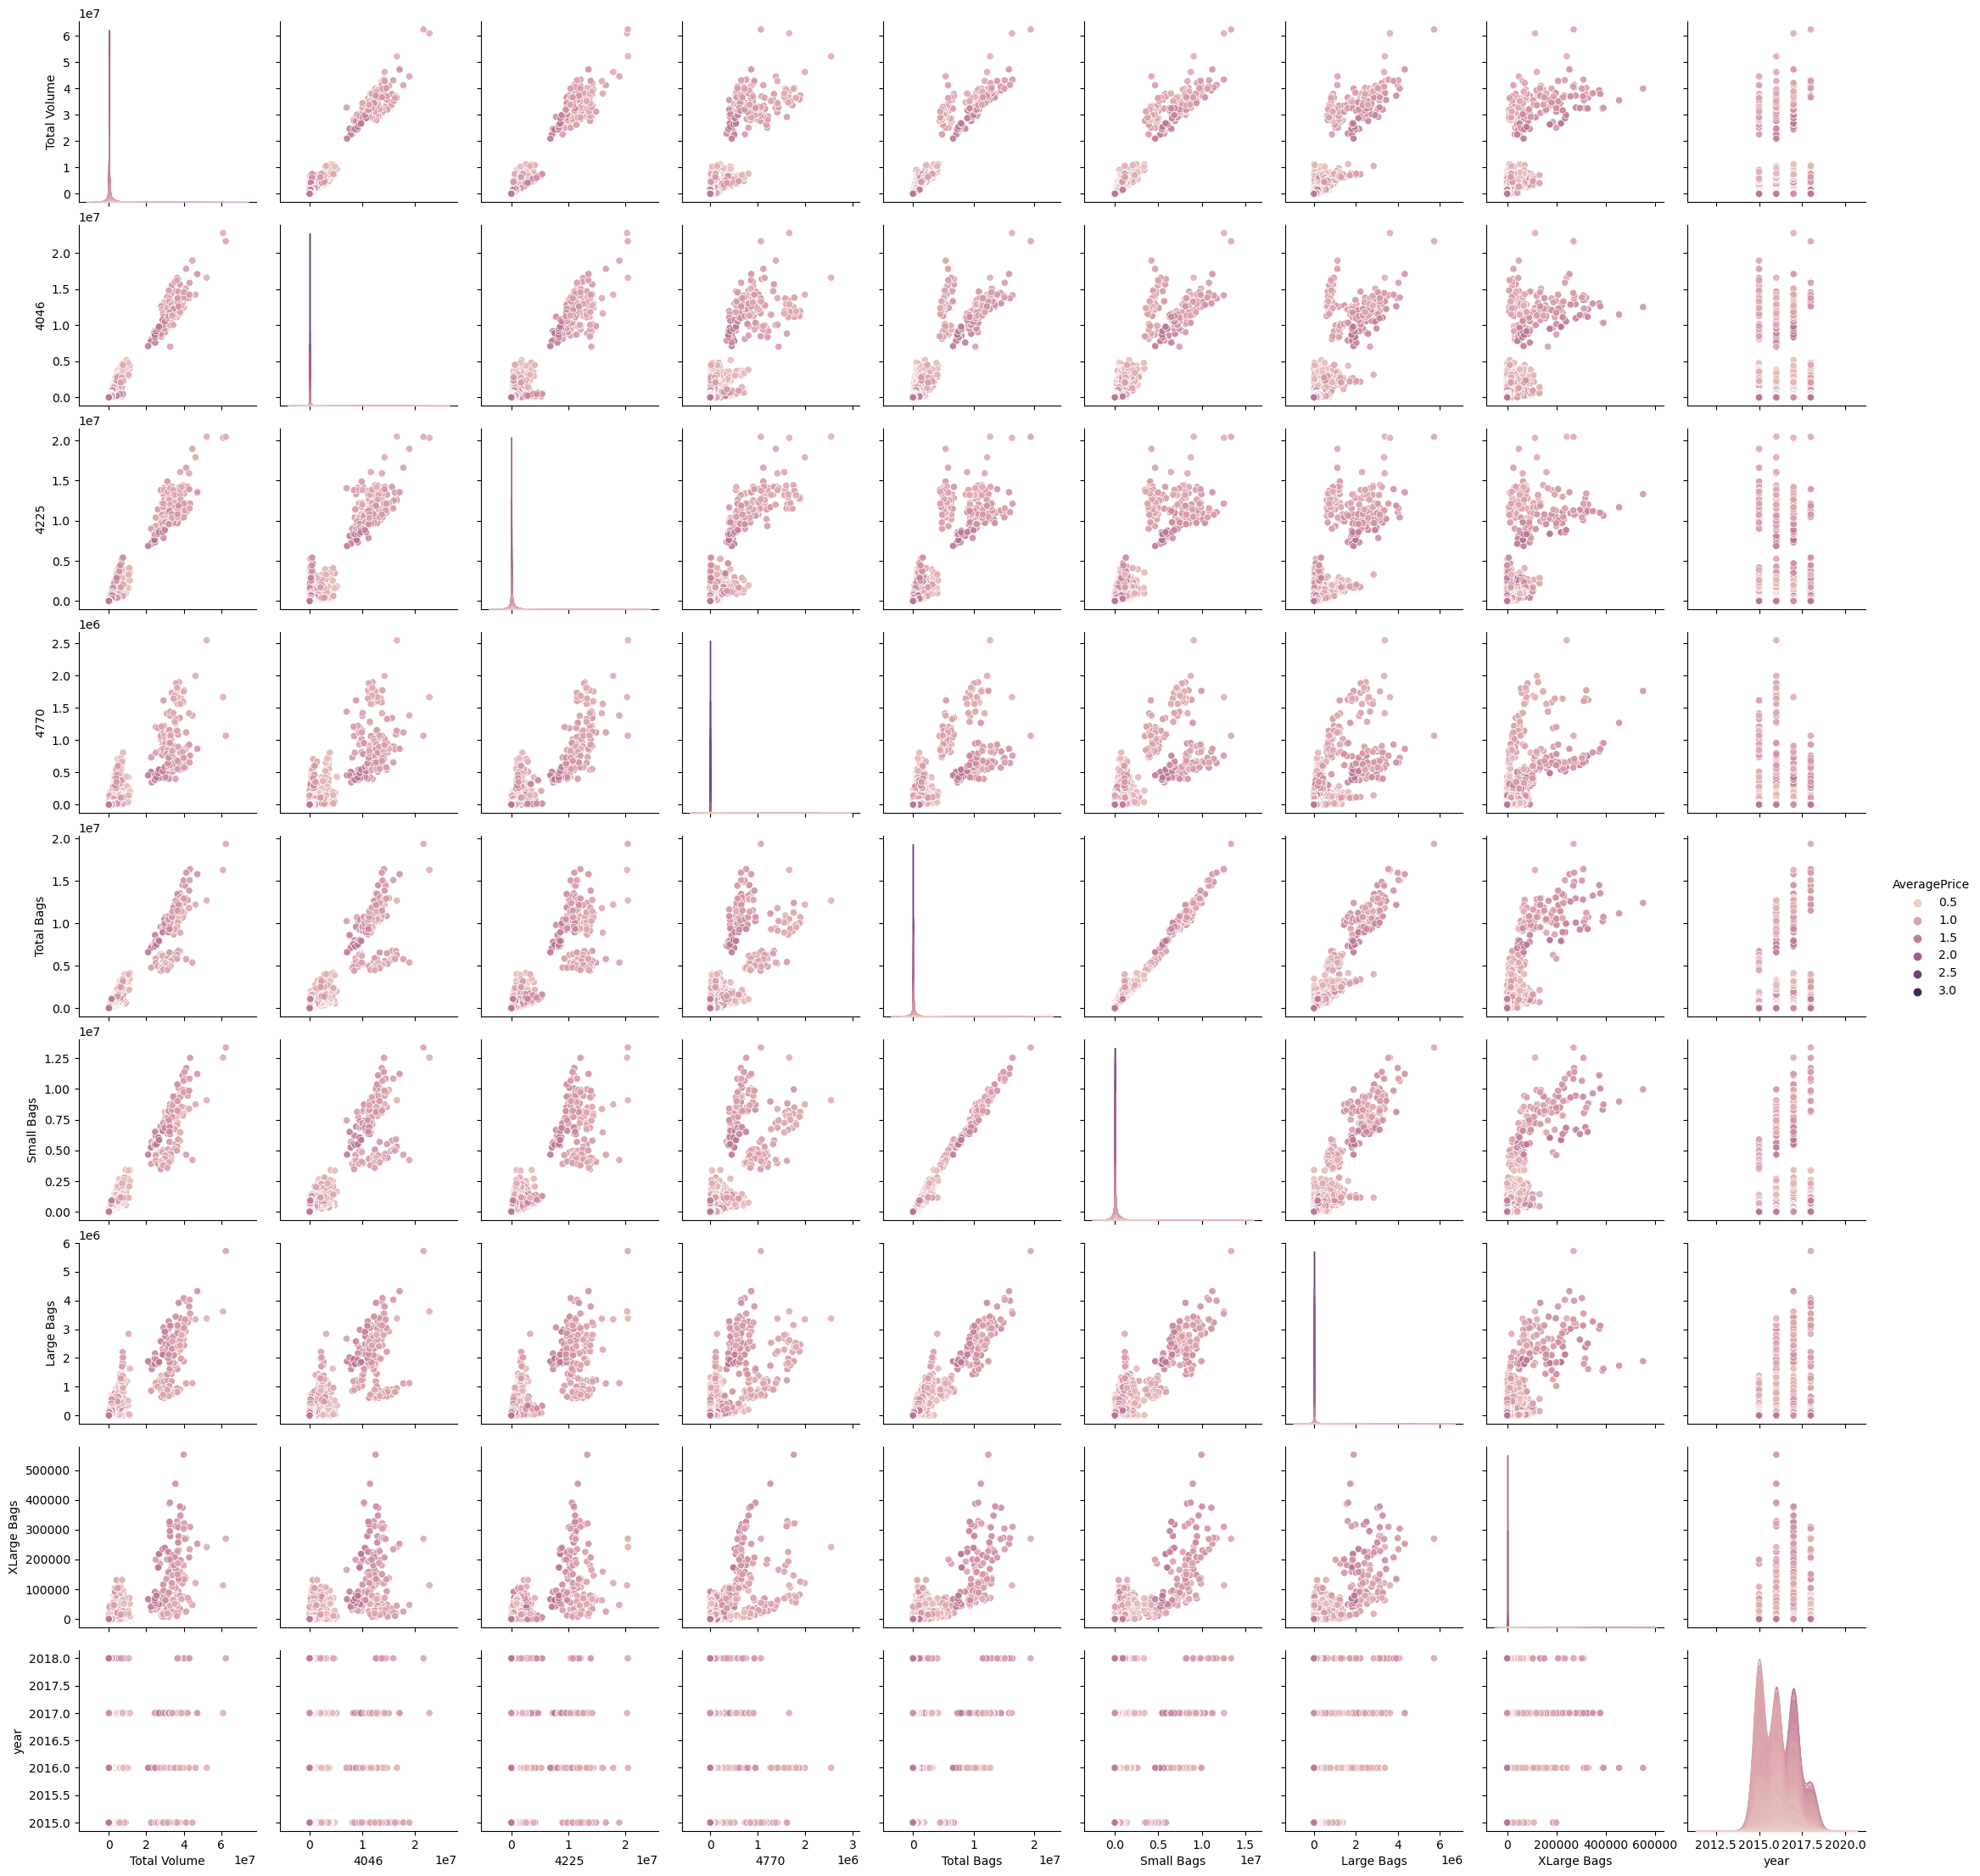

In [34]:
sns.pairplot(df,hue='AveragePrice')
plt.show()

## Checking the outliers

In [35]:
numerical.drop(columns=['AveragePrice'],axis=1,inplace=True)

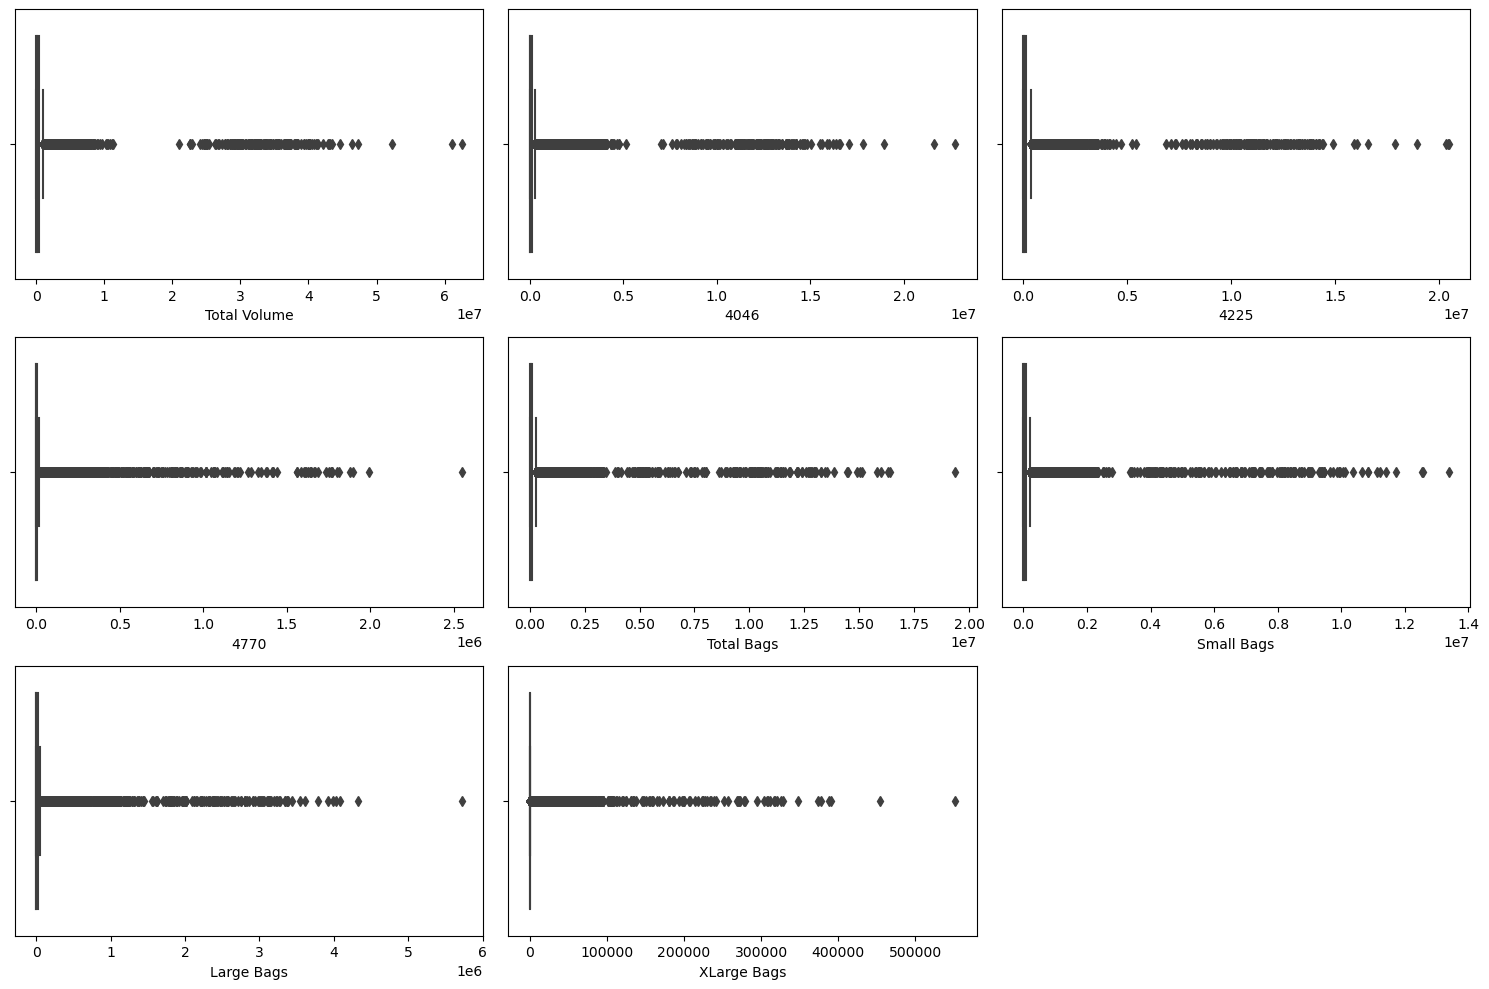

In [36]:
# Checking the outliers using boxplot
plt.figure(figsize=(15,10),facecolor='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(x=col,data=numerical)
        plt.xlabel(col)
    plotnumber+=1
plt.tight_layout()

The all columns has outliers. So we need to remove outliers. 

## Outliers Detection and removel

### Checking outliers using zscore method

In [37]:
# Finding the outliers using zscore mehtod (formula = x - mean/std)
from scipy.stats import zscore

z = np.abs(zscore(numerical))            # Apply the formula and get the scaled data

df1 = df[(z<3).all(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df1.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df1.shape[0])/df.shape[0])*100)

Old Data Frame -  18249
New Data Frame -  17782

Data Loss Percentage After removing outliers with zscore method -
  2.55904433119623


It is affordable loss of data now we will check with IQR method

### Checking the outliers by using IQR metohd

In [38]:
# 1st quantile 
Q1 = numerical.quantile(0.25)

# 3rd quantile
Q3 = numerical.quantile(0.75)

#
IQR = Q3 - Q1

df2 = df[~((numerical<(Q1 - 1.5 * IQR)) | (numerical>(Q3 + 1.5 * IQR))).any(axis=1)]

# Shape of old and New Dataframe
print("Old Data Frame - ",df.shape[0])
print("New Data Frame - ",df2.shape[0])

print("\nData Loss Percentage After removing outliers with zscore method -\n ", ((df.shape[0] - df2.shape[0])/df.shape[0])*100)

Old Data Frame -  18249
New Data Frame -  11747

Data Loss Percentage After removing outliers with zscore method -
  35.62934955340019


In [39]:
# reassigning the changed dataframe name to our original dataframe name
df = df1

In [40]:
df.shape

(17782, 12)

We use zscore method because its Loss less data then IQR method

### Checking how the data has been distributed in each column

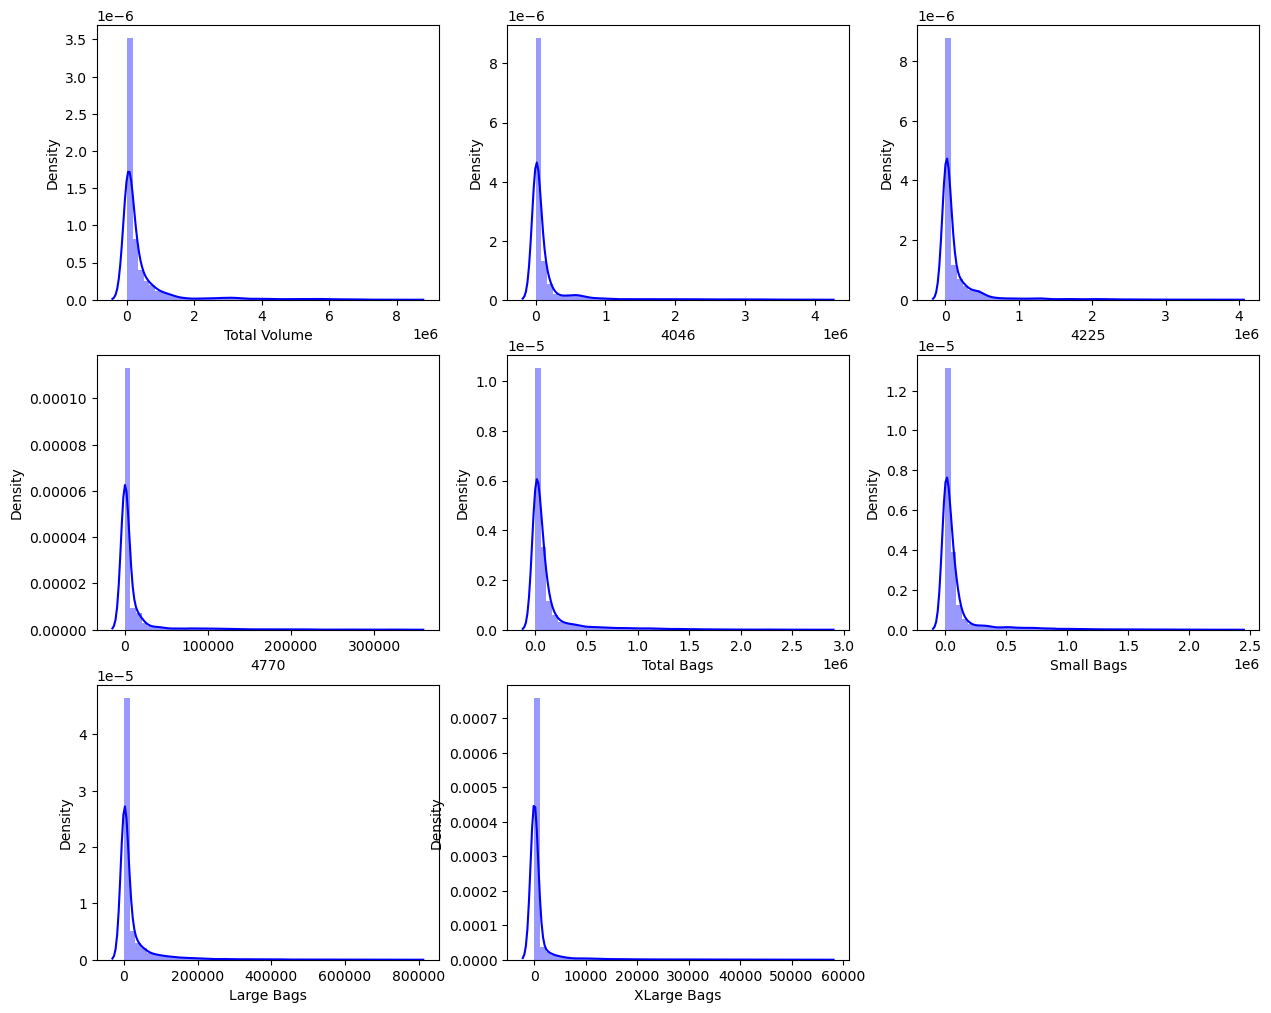

In [41]:
# Let's see how the data gas been distributed each numerical column
plt.figure(figsize=(15,25),facecolor='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=16:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.show()

## Feature Selection and Engineering

## Checking the skewness 

In [42]:
print(df['Total Volume'].skew())
print(df['4046'].skew())
print(df['4225'].skew())
print(df['4770'].skew())
print(df['Total Bags'].skew())
print(df['Small Bags'].skew())
print(df['Large Bags'].skew())
print(df['XLarge Bags'].skew())

3.7820603607273764
4.928849501912451
4.472728690039455
5.137119700324209
4.082102593207687
4.238646766277529
5.072467959222316
6.15939103328228


### Removing the skewness

In [43]:
from scipy.stats import boxcox
df['Total Volume']  = boxcox(df['Total Volume'],0.1)
df['4046'] = boxcox(df['4046'],0.1)
df['4225'] = boxcox(df['4225'],0.2)
df['Total Bags'] = boxcox(df['Total Bags'],0.1)
df['Small Bags'] = boxcox(df['Small Bags'],0.2)
df['Large Bags'] = boxcox(df['Large Bags'],0.1)

Other feature not able transform by Boxcox Method as they showing data must be positive. So others columns are transfrom using yeo-johnson method.

In [44]:
# Removing the skewness using PowerTransformer yeo-johnson method
from sklearn.preprocessing import PowerTransformer

features = ['4770', 'XLarge Bags']

power = PowerTransformer(method='yeo-johnson')

df[features] = power.fit_transform(df[features])

In [45]:
print(df['Total Volume'].skew())
print(df['4046'].skew())
print(df['4225'].skew())
print(df['4770'].skew())
print(df['Total Bags'].skew())
print(df['Small Bags'].skew())
print(df['Large Bags'].skew())
print(df['XLarge Bags'].skew())

0.30918265961779123
-0.05387556407965008
0.5845756821984276
0.02801471657494871
0.06311040669164804
0.503858661477522
-0.8271850418743445
0.8606028611391257


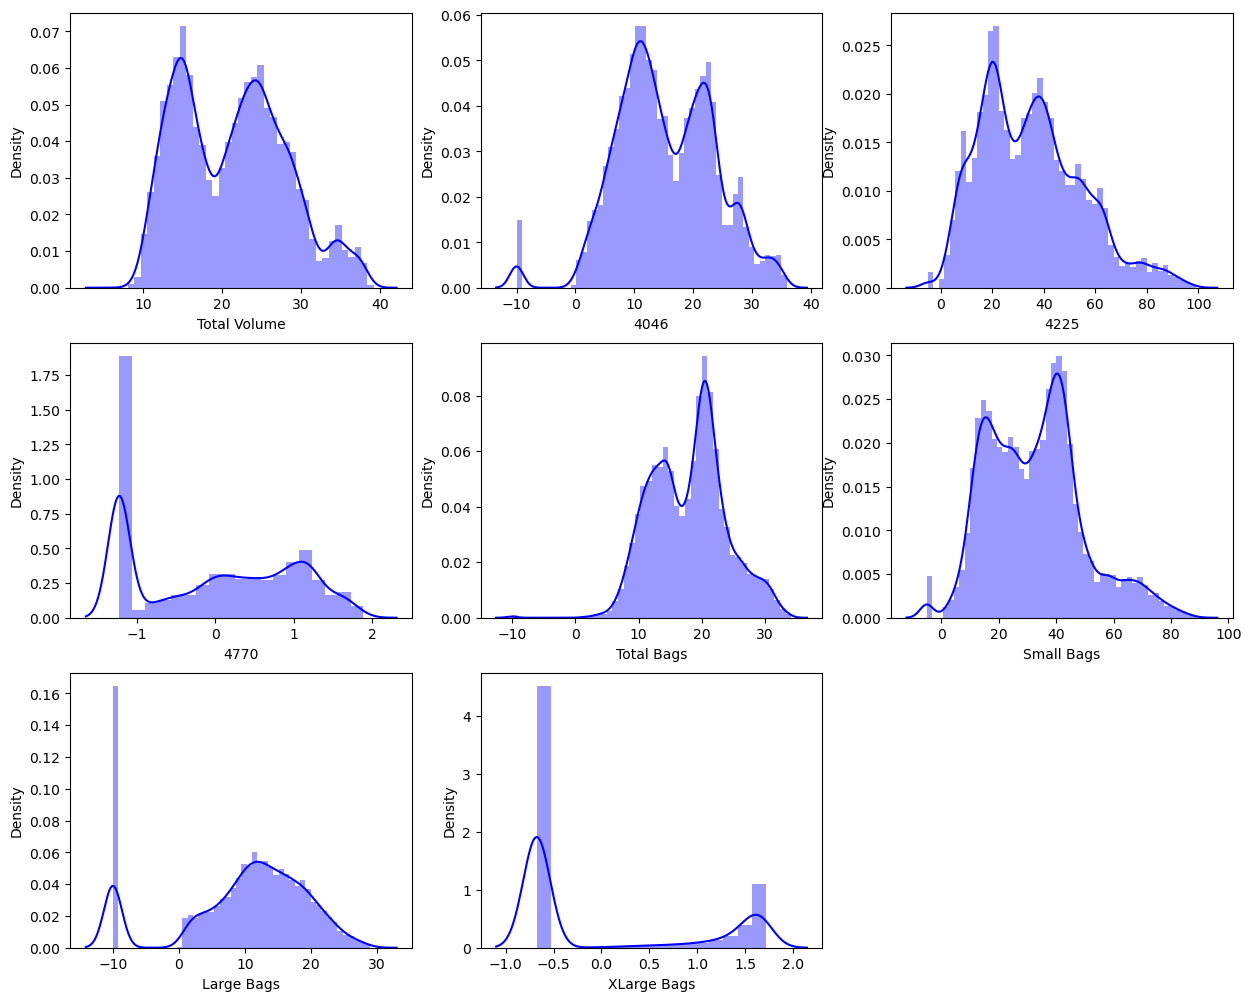

In [46]:
# Let's see how the data gas been distributed each numerical column
plt.figure(figsize=(15,25),facecolor='white')
plotnumber = 1

for col in numerical:
    if plotnumber<=16:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=10)
    plotnumber+=1
plt.show()

This looks almsot normal and skewness is also removed.

## Encoding categorical columns

In [47]:
# Econding categorical columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

for i in df.columns:
    if df.dtypes[i] == 'object':
        df[i] = LE.fit_transform(df[i].values.reshape(-1,1))
        
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,20.253684,10.024745,39.276911,-0.212550,14.770587,25.613025,5.738556,-0.675702,0,2015,0
2015-12-20,1.35,19.780982,9.181565,37.551270,-0.165117,14.991813,26.165214,5.808695,-0.675702,0,2015,0
2015-12-13,0.93,22.156530,9.499358,45.883209,0.034215,14.608831,25.202653,5.898008,-0.675702,0,2015,0
2015-12-06,1.08,20.885767,10.201548,41.817481,-0.110976,13.791744,23.170847,6.316711,-0.675702,0,2015,0
2015-11-29,1.28,19.565874,9.832667,37.397566,-0.100289,13.940135,23.470895,6.966743,-0.675702,0,2015,0


## Correlation

In [48]:
# Checking the correlation between features vs features and feature vs target
df_corr = df.corr()

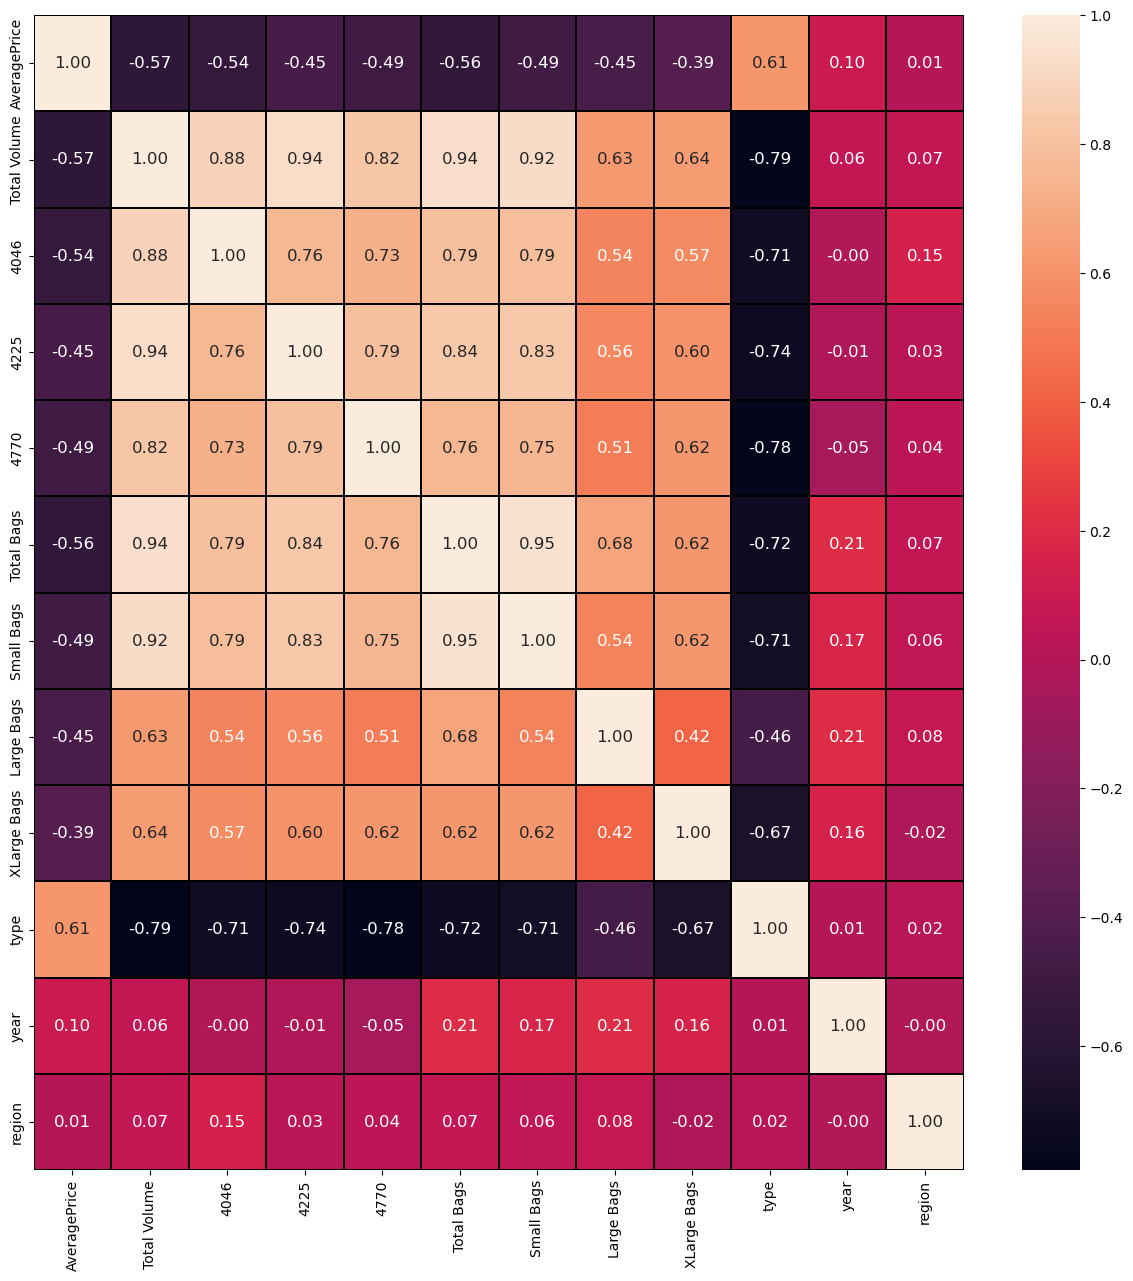

In [49]:
# Visualizing the correlation using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=True, annot_kws={'size':12},linewidths=0.1,linecolor='black',fmt='0.2f')
plt.show()

This heamap contains both positive and negative correlation.
1. We are going to remove some of columns which are not reqire for further analysis.
2. 4046,4225,4770 are shows multicollinearity with Total Volume. These feature are nothing but Total avacado sold under particular grade, which are already counted in Total Volume. As we do not have any price data according each grade of avacado. These feature doesnot have any meaning in ML model.So gone drop them.
3. Same goes with Total bags. Total bags is sum of all other type of bags. We gone keep drop Total bags and going to keep other differnt size bags counts features.

In [50]:
df = df.drop(columns=['4046','4225','4770','Total Bags'],axis=1)

### The dataset can be seen in two angles to find the average price and find the region. So we build two model One of Regression and other of Classification.

## 1. Regression model target columns is AveragePrice

### Correlation between feature vs target columns AveragePrice

In [51]:
df_corr['AveragePrice'].drop('AveragePrice').sort_values(ascending=True)

Total Volume   -0.571487
Total Bags     -0.559605
4046           -0.541715
4770           -0.491320
Small Bags     -0.486949
4225           -0.450159
Large Bags     -0.445248
XLarge Bags    -0.387285
region          0.010428
year            0.099910
type            0.608447
Name: AveragePrice, dtype: float64

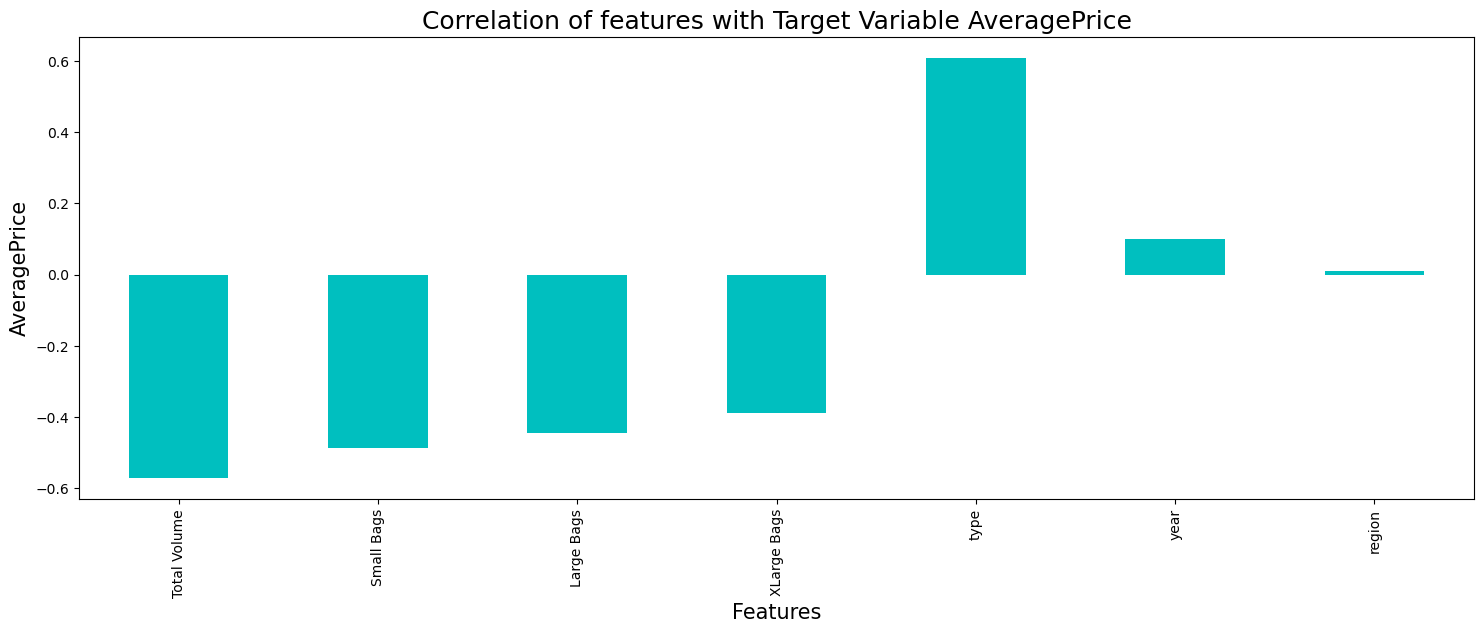

In [52]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (18,6))
df.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable AveragePrice',fontsize = 18)
plt.show()

From the above barplot we can notice the postive and negative correlation between the features and target. Here the feature region and year has very less correlation with the AveragePrice. So we will remove it.

## Sparating features and target

In [53]:
x = df.drop(columns=['AveragePrice','region','year'])
y = df['AveragePrice']

## Feature Scaling using Standard Scalarization

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

x.shape

(17782, 5)

We have scaled the data using Standard Scalrization method to overcome the issue of biasness.

## Checking Variance Inflation Factor (VIF)

In [55]:
# Find variance inflation factor in each scaled column i.e. x.shape[1] (1/1-R2)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif

,Feature,VIF values
0,Total Volume,10.969351
1,Small Bags,7.200624
2,Large Bags,1.708696
3,XLarge Bags,1.962868
4,type,3.136535


So, we have no multicollinearity issue, We can now move ahead fro model building.

## Modelling

In [56]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [57]:
# Find the best ranom state 

maxAcc = 0
maxRS  = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    acc = r2_score(y_test,y_pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print('The  Best accuracy score is',maxAcc,' on best random state is',maxRS)

The  Best accuracy score is 0.4403766922891925  on best random state is 99


### Creating train test split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=maxRS)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (13336, 5)
The shape of y_train  (13336,)
The shape of x_test   (4446, 5)
The shape of y_test   (4446,)


### Applying all Classification Model

In [59]:
LR  = LinearRegression()
L1 = Lasso()
L2 = Ridge(alpha=0.01)
KNN = KNeighborsRegressor()
DT  = DecisionTreeRegressor()
ET  = ExtraTreeRegressor()
RFR = RandomForestRegressor(n_estimators = 70 ,max_depth=25)
BC  = BaggingRegressor()
ABR = AdaBoostRegressor(learning_rate=0.1)
GBR = GradientBoostingRegressor(max_depth=25,learning_rate=0.1)
SVM = SVR()
XGB = XGBRegressor()

models = {'LinearRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFR,
         'Bagging':BC,'AdaBoost':ABR,'GradientBoosting':GBR,'SVC':SVM,'XGBoost':XGB,'Lasso':L1,'Ridge':L2}

### Applying all the models 

In [60]:
for name,model in models.items():
    model.fit(x_train,y_train)
    model.score(x_train,y_train)
    y_pred = model.predict(x_test)
    print('\033[1m'+'Error of',name,'\033[0m')
    print('Mean absolute error      :',mean_absolute_error(y_test,y_pred))
    print('Mean squared error       :',mean_squared_error(y_test,y_pred))
    print('Root mean squared error  :',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('\n')
    print('\033[1m'+'R2 Score '+'\033[0m')
    print(r2_score(y_test,y_pred))
    print('*************************************************************************\n')

Error of LinearRegression 
Mean absolute error      : 0.22916163120233624
Mean squared error       : 0.08818018016133501
Root mean squared error  : 0.2969514777894446


R2 Score 
0.4403766922891925
*************************************************************************

Error of KNeighbors 
Mean absolute error      : 0.1882136752136752
Mean squared error       : 0.06629935492577597
Root mean squared error  : 0.25748661115828136


R2 Score 
0.579240320956792
*************************************************************************

Error of DecisionTree 
Mean absolute error      : 0.24160368870895188
Mean squared error       : 0.11760290148448042
Root mean squared error  : 0.34293279441383323


R2 Score 
0.25364946403238586
*************************************************************************

Error of ExtraTree 
Mean absolute error      : 0.24585470085470085
Mean squared error       : 0.1190249887539361
Root mean squared error  : 0.3449999837013563


R2 Score 
0.24462438401859865

# Cross Validation

In [61]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_score = r2_score(y_test,y_pred)
    score = cross_val_score(model,x,y,cv = 5)
    print('\033[1m',name,'\033[0m\n')
    print('R2 Score                       :',accuracy_score)
    print('Cross Validation Score         :',score)
    print('Mean of Cross Validation Score :',score.mean())
    
    final = accuracy_score - score.mean()
    print('\nDifferent between R2 Score vs Cross Validaton Score :',final)
    print('********************************************************************************\n')

 LinearRegression 

R2 Score                       : 0.4403766922891925
Cross Validation Score         : [-0.41540932 -0.02975278  0.45107108  0.00312553 -0.00228982]
Mean of Cross Validation Score : 0.001348939228389212

Different between R2 Score vs Cross Validaton Score : 0.4390277530608033
********************************************************************************

 KNeighbors 

R2 Score                       : 0.579240320956792
Cross Validation Score         : [-0.9685192   0.03901259  0.26861371 -0.01812089 -0.27206646]
Mean of Cross Validation Score : -0.19021605100128194

Different between R2 Score vs Cross Validaton Score : 0.7694563719580739
********************************************************************************

 DecisionTree 

R2 Score                       : 0.25502279612381407
Cross Validation Score         : [-2.02095588 -0.32860773 -0.30962115 -0.70650332 -0.58285051]
Mean of Cross Validation Score : -0.7897077182213167

Different between R2 Score vs Cross

### RanodomForest is out best model.

**We can see that RanodomForest gives less error between accuracy score and CrossValidation.**

## Hyper paramter tuning : GridSearchCV

### Tune the parameter with RandomForestClassifier model


In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[30,60,80],
              'max_depth': [10,20,40],
             'min_samples_leaf':[5,10],
             'max_features':["auto","sqrt","log2"]
             }

GCV = GridSearchCV(estimator = RFR, param_grid=param_grid, n_jobs = -1, verbose=5)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best estimator :  RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=5,
                      n_estimators=80)


Best score :  0.5854840230786433


## Final Model

In [63]:
Final_mod = GCV.best_estimator_
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.18685580307754546
Mean squared error : 0.061812580279720544
Root Mean Squared Error: 0.24862135925885478


 R2 Score of Final Model :
0.6077150151996997




 Actual Values Vs Predicted Value plot :


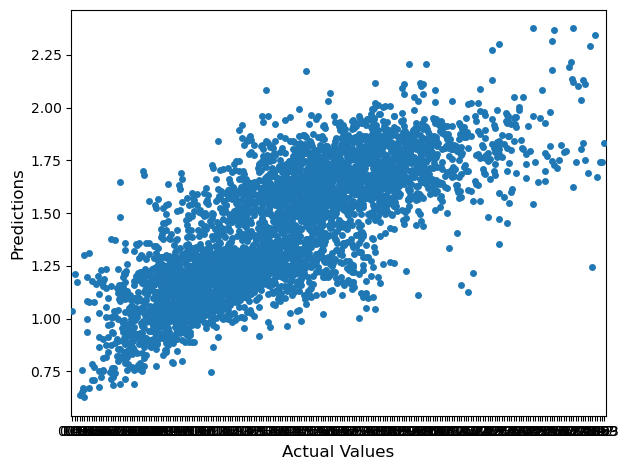

In [64]:
y_pred=Final_mod.predict(x_test)
sns.swarmplot(x = y_test.round(2),y = y_pred)
print('\033[1m'+' Actual Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Actual Values' , fontsize=12)
plt.ylabel('Predictions', fontsize=12)
plt.tight_layout()

## Saving Model

In [65]:
import pickle
filename = 'Avocado_Regression_model.pkl'
pickle.dump(Final_mod, open(filename, 'wb'))  # Saved model

## Predicting the saved model

In [66]:
import pickle
loaded_model = pickle.load(open('Avocado_Regression_model.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

60.77150151996997


In [67]:
conculsion = pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conculsion

,0,1,2,3,4,5,6,7,8,9,...,4436,4437,4438,4439,4440,4441,4442,4443,4444,4445
Predicted,1.12798,0.777346,1.317864,1.442471,1.202851,1.347178,1.656975,1.641683,1.209017,1.885337,...,1.328549,1.793628,1.229476,1.311589,1.850228,1.121702,1.158837,1.288854,1.359473,1.28174
Original,0.99000,0.840000,1.580000,1.750000,1.230000,1.300000,1.690000,1.510000,1.080000,2.180000,...,1.480000,2.480000,1.220000,1.180000,1.930000,1.750000,1.150000,1.030000,1.680000,1.33000


## 2. Classification model target column is region 

### Correlation between feature vs target columns Region

In [68]:
df_corr['region'].drop('region').sort_values(ascending=True)

XLarge Bags    -0.020865
year           -0.003610
AveragePrice    0.010428
type            0.021970
4225            0.028620
4770            0.037805
Small Bags      0.061269
Total Bags      0.066980
Total Volume    0.068062
Large Bags      0.077776
4046            0.151544
Name: region, dtype: float64

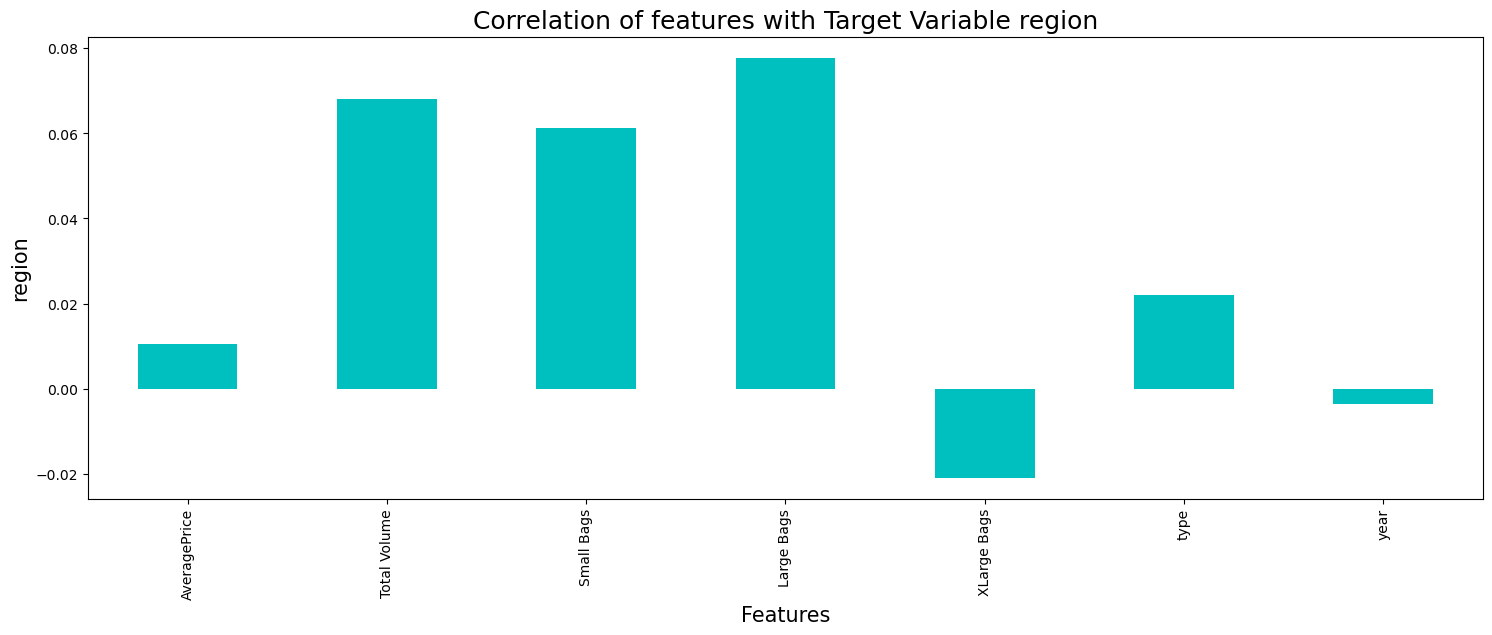

In [69]:
# visualizing correlation of feature vs target using barplot
plt.figure(figsize = (18,6))
df.corr()['region'].drop(['region']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('region',fontsize=15)
plt.title('Correlation of features with Target Variable region',fontsize = 18)
plt.show()

From the above barplot we can notice the postive and negative correlation between the features and target. Here the feature AveragePrice and year has very less correlation with the region.

## Sparating features and target

In [70]:
x1 = df.drop(columns=['AveragePrice','year'],axis=1)
y1 = df['region']

## Feature Scaling using Standard Scalarization

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x1 = pd.DataFrame(scaler.fit_transform(x1), columns = x1.columns)

x1.shape

(17782, 6)

In [72]:
# Find variance inflation factor in each scaled column i.e. x.shape[1] (1/1-R2)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = x1.columns
vif['VIF values'] = [variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]

vif

,Feature,VIF values
0,Total Volume,11.022596
1,Small Bags,7.200818
2,Large Bags,1.711160
3,XLarge Bags,1.967002
4,type,3.167307
5,region,1.024196


So, we have no multicollinearity issue, We can now move ahead fro model building.

## Modelling

In [73]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

### Finding Best Random state

In [74]:
maxAccu = 0
maxRs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25, random_state=i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train,y_train)
    y_pred = RFC.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
        
print("Best accuracy is ", maxAccu*100,"at random_state", maxRs)  

Best accuracy is  99.30274403958614 at random_state 27


### Creating train test split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=maxRs)
print('The shape of x_train ',x_train.shape)
print('The shape of y_train ',y_train.shape)
print('The shape of x_test  ',x_test.shape)
print('The shape of y_test  ',y_test.shape)

The shape of x_train  (13336, 6)
The shape of y_train  (13336,)
The shape of x_test   (4446, 6)
The shape of y_test   (4446,)


### Classification Model

In [80]:
LR  = LogisticRegression()
KNN = KNeighborsClassifier()
DT  = DecisionTreeClassifier()
ET  = ExtraTreeClassifier()
RFC = RandomForestClassifier()
BC  = BaggingClassifier()
ABC = AdaBoostClassifier()
GBC = GradientBoostingClassifier()
SVM = SVC(probability=True)
XGB = xgb.XGBClassifier()

models = {'LogisticRegression':LR,'KNeighbors':KNN,'DecisionTree':DT,'ExtraTree':ET,'RandomForest':RFC,
         'Bagging':BC,'AdaBoost':ABC,'GradientBoosting':GBC,'SVC':SVM,'XGBoost':XGB}

### Applying all Classification Model

In [81]:
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc_score = accuracy_score(y_test, y_pred)
    print('\n\033[1m'+'Classification ML Algorithm model is',name,'\033[0m\n')

    print('\033[1m'+'Accuracy Score :'+'\033[0m', acc_score)
    
    print('\n\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
    
    print('\n\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(y_test, y_pred))
    
    print('****************************************************************************************')


Classification ML Algorithm model is LogisticRegression 

Accuracy Score : 0.6556455240665767

Confusion matrix : 
 [[98  0  0 ...  0  0  0]
 [ 0 94  2 ...  0  0  0]
 [ 0  6 76 ...  0  0  0]
 ...
 [ 0  0  0 ... 44  0  0]
 [ 0  0  0 ...  1 63  0]
 [ 0  0  0 ...  0  0 90]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       106
           1       0.84      0.98      0.90        96
           2       0.75      0.92      0.82        83
           3       0.78      0.80      0.79        82
           4       0.74      0.55      0.63        98
           5       0.63      0.58      0.60        81
           6       0.96      0.99      0.97        67
           7       0.88      0.61      0.72        94
           8       0.69      0.88      0.77        80
           9       0.48      0.77      0.59        77
          10       0.51      0.51      0.51        83
          11       0.58      0.53      0.56        

# Cross Validation

In [85]:
for name,model in models.items():
    score = cross_val_score(model, x1, y1, cv =5)

    print('\n\033[1m'+'Cross Validation Score', name, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
        
    final = acc_score - score.mean()
    print('\nDifferent between Accuracy vs Cross Val Score: ',final)
    
    print('\n***********************************************************************************')


Cross Validation Score LogisticRegression :

Score : [0.59235311 0.57745291 0.50703037 0.59139483 0.44656918]
Mean Score : 0.5429600784017825

Different between Accuracy vs Cross Val Score:  0.4570399215982175

***********************************************************************************

Cross Validation Score KNeighbors :

Score : [0.72195671 0.82316559 0.80652418 0.80596175 0.63217098]
Mean Score : 0.7579558423906599

Different between Accuracy vs Cross Val Score:  0.24204415760934006

***********************************************************************************

Cross Validation Score DecisionTree :

Score : [1. 1. 1. 1. 1.]
Mean Score : 1.0

Different between Accuracy vs Cross Val Score:  0.0

***********************************************************************************

Cross Validation Score ExtraTree :

Score : [0.69018836 0.86561709 0.86276715 0.84926884 0.77980877]
Mean Score : 0.8095300446876246

Different between Accuracy vs Cross Val Score:  0.1904699553

### DecisionTree   is out best model.

**We can see that DecisionTree gives less error between accuracy score and CrossValidation.**

Score : [1. 1. 1. 1. 1.]

Mean Score : 1.0

Different between Accuracy vs Cross Val Score:  0.0

## Hyper Parameter Tuning : GridSearchCV

### Tune the parameter with RandomForestClassifier model

In [89]:
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'max_depth': [5, 10,100,500], 
              'criterion':['gini','entropy']  
             }

GCV = GridSearchCV(estimator = DT, param_grid=param_grid)

GCV.fit(x_train,y_train)

print('Best estimator : ',GCV.best_estimator_)
print('\n')
print('Best score : ',GCV.best_score_)

Best estimator :  DecisionTreeClassifier(max_depth=100)


Best score :  1.0


## Final Model

In [93]:
model = DecisionTreeClassifier(max_depth=100)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

print('\033[1m'+' Final Model :' +'\033[0m')
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('\nConfusion matrix :\n',confusion_matrix(y_test, y_pred))
print('\nClassification report :\n',classification_report(y_test, y_pred))

 Final Model :
Accuracy Score 1.0

Confusion matrix :
 [[106   0   0 ...   0   0   0]
 [  0  96   0 ...   0   0   0]
 [  0   0  83 ...   0   0   0]
 ...
 [  0   0   0 ...  44   0   0]
 [  0   0   0 ...   0  64   0]
 [  0   0   0 ...   0   0  92]]

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00        83
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00        98
           5       1.00      1.00      1.00        81
           6       1.00      1.00      1.00        67
           7       1.00      1.00      1.00        94
           8       1.00      1.00      1.00        80
           9       1.00      1.00      1.00        77
          10       1.00      1.00      1.00        83
          11       1.00      1.00      1.00        85
          12       1.00 

## Saving the model

In [97]:
import joblib
joblib.dump(model,'Avocado_classification_model.pkl')

['Avocado_classification_model.pkl']

## Predicting the saved model

In [98]:
# Let's load the saved model and get the predictions
model = joblib.load("Avocado_classification_model.pkl")

# Prediction 
prediction = model.predict(x_test)
prediction

array([34, 36, 50, ..., 45, 42, 17])